<a href="https://colab.research.google.com/github/lilian662/EDO/blob/main/EDPll_13mayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

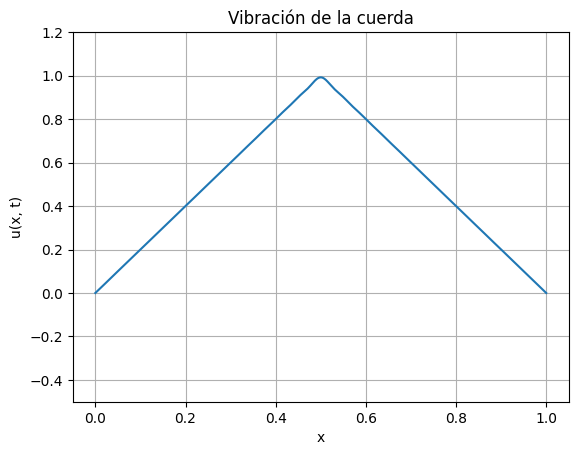

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros del problema
L = 1  # Longitud de la cuerda
c = 1  # Velocidad de propagación
k = 1  # Altura de la función triangular
N = 50  # Número de términos de la serie de Fourier

# Dominio espacial
x = np.linspace(0, L, 500)

# Coeficientes bn de la serie de Fourier para la condición inicial triangular
def bn(n):
    if n % 2 == 0:  # coeficientes pares son cero
        return 0
    return (8 * k) / (np.pi**2 * n**2) * np.sin(n * np.pi / 2)

# Solución u(x, t) como suma de la serie de Fourier
def u(x, t):
    suma = np.zeros_like(x)
    for n in range(1, N + 1):
        coef = bn(n)
        suma += coef * np.sin(n * np.pi * x / L) * np.cos(n * np.pi * c * t / L)
    return suma

# Animación
fig, ax = plt.subplots()
line, = ax.plot(x, u(x, 0))
ax.set_ylim(-0.5, 1.2)
ax.set_title("Vibración de la cuerda")
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.grid()

def animate(t):
    line.set_ydata(u(x, t))
    ax.set_title(f"t = {t:.2f} s")
    return line,

anim = FuncAnimation(fig, animate, frames=np.linspace(0, 2, 100), interval=100)
plt.show()